<a href="https://colab.research.google.com/github/Rohanpeerla/Module-8-Lab-3/blob/master/Module_8_Lab_3_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

# Set the parameters
num_components = 3  # Number of mixture components
num_samples = 1000  # Number of data points

# Generate synthetic data from a Gaussian Mixture Model
tfd = tfp.distributions
mixtures = tfd.Categorical(probs=[0.4, 0.3, 0.3])
components = [tfd.Normal(loc=-5.0, scale=1.0),
              tfd.Normal(loc=0.0, scale=1.0),
              tfd.Normal(loc=5.0, scale=2.0)]
gmm = tfd.Mixture(cat=mixtures, components=components)
data = gmm.sample(num_samples)

# Fit a Gaussian Mixture Model to the data
num_components_to_fit = 3  # Number of components to fit
gmm_fit = tfp.distributions.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(logits=tf.Variable(tf.zeros([num_components_to_fit]))),
    components_distribution=tfd.Normal(
        loc=tf.Variable(tf.random.normal([num_components_to_fit])),
        scale=tf.Variable(tf.random.normal([num_components_to_fit]))
    )
)
optimizer = tf.optimizers.Adam(learning_rate=0.01)
@tf.function
def fit_distribution():
    with tf.GradientTape() as tape:
        loss = -tf.reduce_mean(gmm_fit.log_prob(data))
    gradients = tape.gradient(loss, gmm_fit.trainable_variables)
    optimizer.apply_gradients(zip(gradients, gmm_fit.trainable_variables))

# Training loop
num_iterations = 1000
for i in range(num_iterations):
    fit_distribution()

# Get the parameters of the fitted distribution
fitted_means = gmm_fit.components_distribution.mean()
fitted_stddevs = gmm_fit.components_distribution.stddev()

print("Fitted means:", fitted_means.numpy())
print("Fitted standard deviations:", fitted_stddevs.numpy())


Fitted means: [nan nan nan]
Fitted standard deviations: [nan nan nan]


NameError: name 'np' is not defined

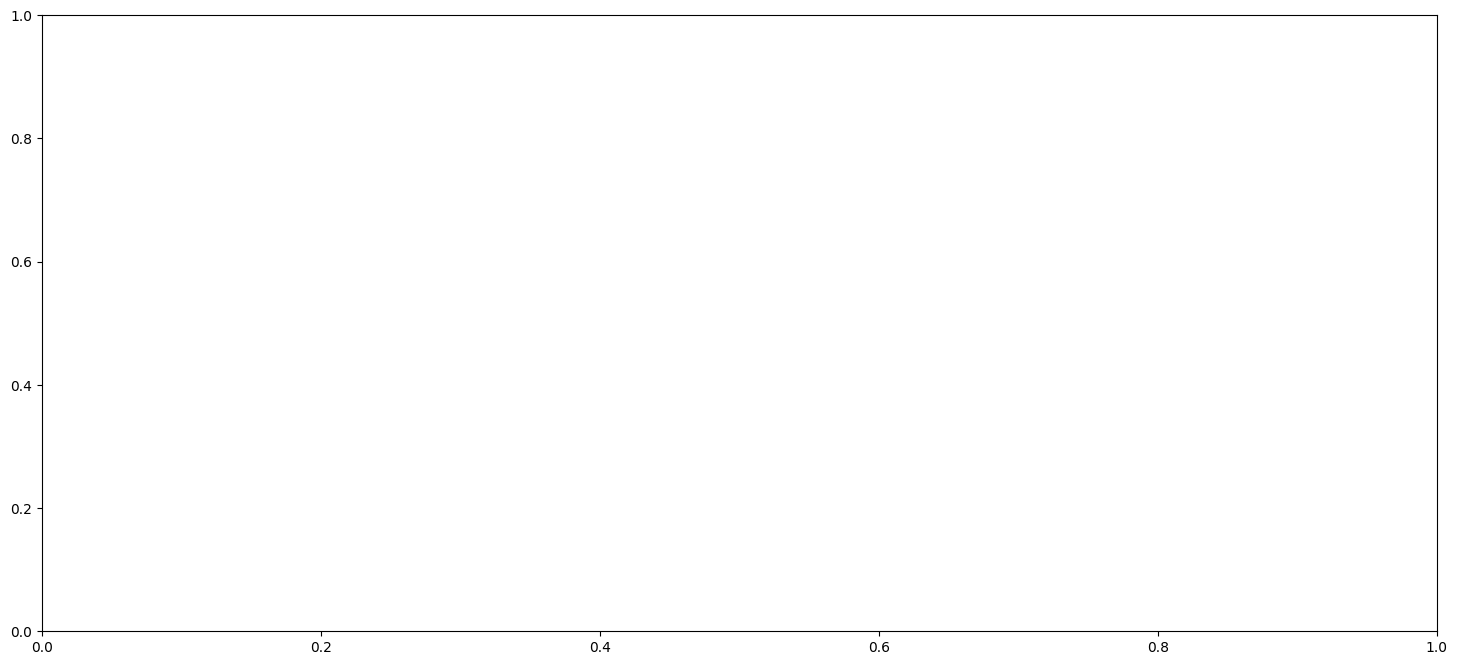

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))
x1 = np.random.normal(2.0, 0.5, size=8000)
x2 = np.random.normal(-1.0, 0.5, size=20000)
x = np.concatenate([x1, x2])
y = np.concatenate([np.zeros(len(x1)), np.ones(len(x2))])
sns.histplot(x1, color='blue', alpha=0.5, ax=ax)
sns.histplot(x2, color='red', alpha=0.5, ax=ax)
ax.fill_between(np.linspace(-2.0, 1.5, 100), 0, 2400,  color='r', alpha=0.1)
ax.fill_between(np.linspace(1.5, 4.0, 100), 0, 2400,  color='b', alpha=0.1)
ax.vlines(1.0, 0, 2200, color="k", linestyles="--", lw=3)
ax.vlines(1.5, 0, 2200, color="g", linestyles="--", lw=3)
ax.scatter(x1, [np.random.randint(2000, 3000) for _ in x1], color='b', s=1)
ax.scatter(x2, [np.random.randint(2000, 3000) for _ in x2], color='r', s=1)
ax.set_xlim(-2.0, 4.0)
ax.set_ylim(0, 3200)
plt.show()


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X = X[:, [2, 3]]  # Selecting only two features for demonstration


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

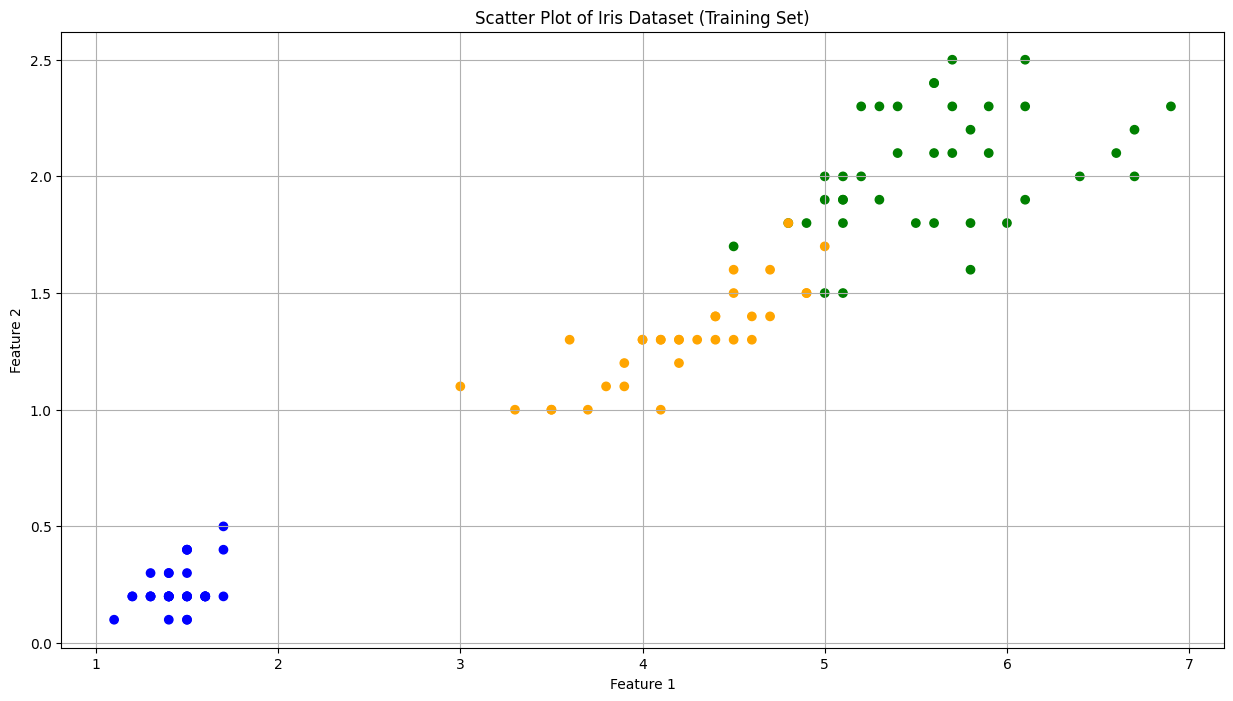

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Adjust the figsize parameter to change the size of the figure
color_scheme = ['blue', 'orange', 'green']  # Change the color scheme as desired
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_scheme[idx] for idx in y_train])
plt.xlabel('Feature 1')  # Add labels to the axes as needed
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Iris Dataset (Training Set)')  # Add a title to the plot
plt.grid(True)  # Add gridlines to the plot if desired
plt.show()


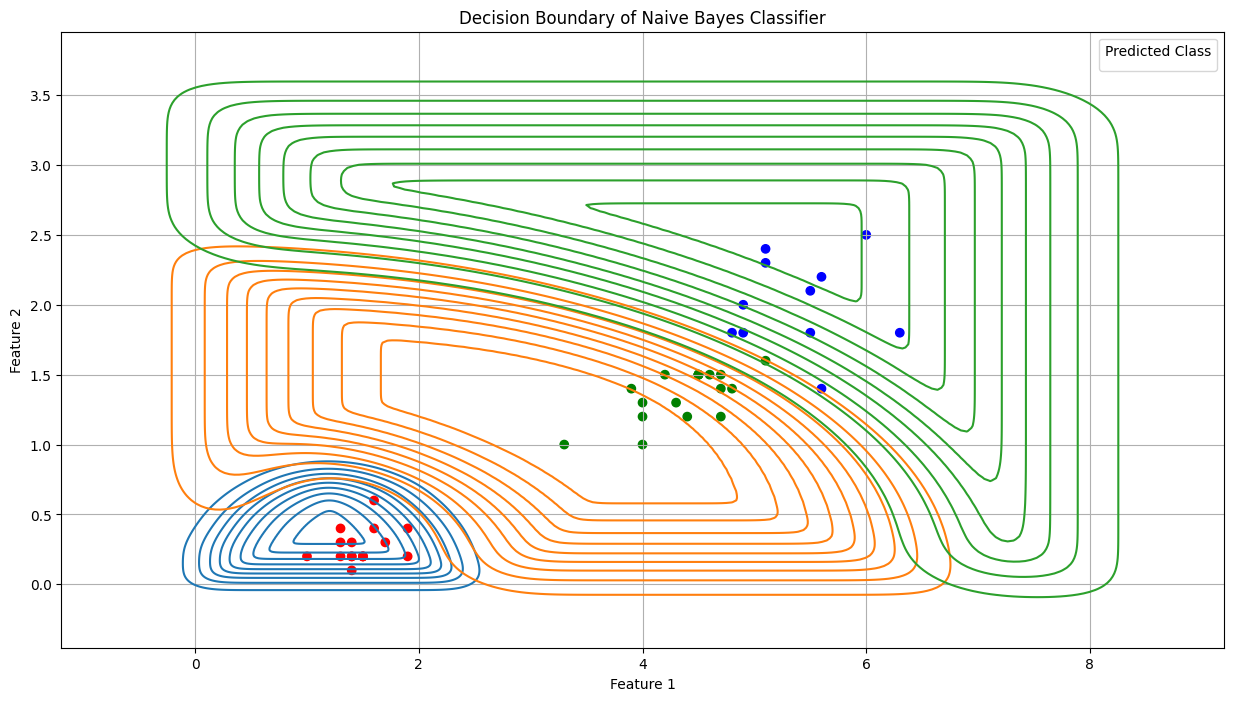

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))  # Adjust the figsize parameter to change the size of the figure

# Adjust the range of values for X1_scan and X2_scan by modifying the arguments in np.linspace
X1_scan, X2_scan = np.meshgrid(np.linspace(0.0, 8.0, 250), np.linspace(0.0, 3.5, 250))

X_scan = np.stack([np.reshape(X1_scan, -1), np.reshape(X2_scan, -1)], axis=-1)
predictions = gnb.predict(X_scan)
color_map = ['r', 'g', 'b']

# Scatter plot of test data
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=[color_map[x] for x in y_test])

# KDE plot with fill=False to remove the fill between contours
sns.kdeplot(x=X_scan[:, 0], y=X_scan[:, 1], hue=[color_map[x] for x in predictions], fill=False)

plt.xlabel('Feature 1')  # Add labels to the x-axis and y-axis as needed
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Naive Bayes Classifier')  # Add a title to the plot
plt.grid(True)  # Add gridlines to the plot if desired
plt.legend(title='Predicted Class')  # Add a legend to the plot
plt.show()


In [14]:
import pandas as pd

# Load data from the JSON file into a DataFrame
arxiv_df = pd.read_json(open("your_file_path/arxiv-paper-data.json", 'r'))

# Update the 'tag' column based on your desired modifications
arxiv_df["tag"] = arxiv_df["tag"].apply(lambda x: json.loads(x.replace("\'", "\"").replace("None", "\"None\""))[0]['term'].split('.')[0])
arxiv_df["tag"] = arxiv_df["tag"].apply(lambda x: 'your_custom_category' if x in ['list', 'of', 'categories'] else x)

# Drop unnecessary columns
arxiv_df = arxiv_df.drop(["day", "month", "link", "author"], axis=1)


FileNotFoundError: [Errno 2] No such file or directory: 'your_file_path/arxiv-paper-data.json'

In [16]:
import pandas as pd

data = {
    'tag': ['cs', 'cs', 'stat', 'stat'],
    'summary': ['This is a summary of a CS paper.', 'Another CS summary.', 'A summary for a STAT paper.', 'Yet another STAT summary.'],
    'title': ['CS Paper 1', 'CS Paper 2', 'STAT Paper 1', 'STAT Paper 2']
}
arxiv_df = pd.DataFrame(data)



In [18]:
from collections import defaultdict

dictionary = defaultdict(lambda: [0, 0])
for desc, tag in zip(df['keywords'], df['tag']):
    for word in set(desc):
        if tag == 'cs':
            dictionary[word][0] += 1
        else:
            dictionary[word][1] += 1

print("We have a dictionary of", len(dictionary), "words.")

words, counts_cs, counts_stat = [], [], []
for word, count in dictionary.items():
    if count[0] + count[1] > WORD_COUNT_THRESHOLD:
        words.append(word)
        counts_cs.append(count[0])
        counts_stat.append(count[1])
print("Out of those", len(words), f"have over {WORD_COUNT_THRESHOLD} occurrences")

fig = pg.Figure([pg.Bar(x=words[:200], y=counts_cs[:200]),
                 pg.Bar(x=words[:200], y=counts_stat[:200])])
fig.update_layout(title_text=f'Some random words and the frequency plot of those with over {WORD_COUNT_THRESHOLD} occurrences')
fig.show()


NameError: name 'df' is not defined

In [20]:
import pandas as pd
from collections import defaultdict

# Sample data
data = {
    'tag': ['cs', 'cs', 'stat', 'cs', 'stat', 'stat', 'cs', 'cs', 'stat', 'stat'],
    'keywords': [['algorithm', 'data', 'analysis'], ['machine', 'learning'],
                 ['statistics', 'modeling'], ['algorithm', 'python', 'code'],
                 ['regression', 'prediction'], ['data', 'visualization'],
                 ['algorithm', 'code', 'implementation'], ['neural', 'network'],
                 ['probability', 'distribution'], ['bayesian', 'inference']]
}

# Create DataFrame
df = pd.DataFrame(data)

# Word count threshold
WORD_COUNT_THRESHOLD = 2

# Preprocessing and filtering
dictionary = defaultdict(lambda: [0, 0])
for desc, tag in zip(df['keywords'], df['tag']):
    for word in set(desc):
        if tag == 'cs':
            dictionary[word][0] += 1
        else:
            dictionary[word][1] += 1

# Filtering words based on count threshold
words, counts_cs, counts_stat = [], [], []
for word, count in dictionary.items():
    if count[0] + count[1] > WORD_COUNT_THRESHOLD:
        words.append(word)
        counts_cs.append(count[0])
        counts_stat.append(count[1])

# Displaying some stats
print("We have a dictionary of", len(dictionary), "words.")
print("Out of those", len(words), f"have over {WORD_COUNT_THRESHOLD} occurrences")


We have a dictionary of 19 words.
Out of those 1 have over 2 occurrences


In [21]:
def explain(example):
    from IPython.display import HTML
    import re
    html = ""
    title, desc, answer = example["title"], example["summary"], example["tag"]
    title = re.sub(' +', ' ', re.sub('[^(\w| )]', '', re.sub('(-|_|\n)', ' ', title)))
    desc = re.sub(' +', ' ', re.sub('[^(\w| )]', '', re.sub('(-|_|\n)', ' ', desc)))
    for text in [title, desc]:
        for word in text.split():
            idx = words_to_index[word.lower()]
            if idx == -1:
                html += f"<span style=''>{word}</span> "
            else:
                posterior = np.multiply(evidence[idx], prior)
                posterior /= np.sum(posterior)
                if (posterior[0] > posterior[1] and answer == 'cs') or (posterior[0] <= posterior[1] and answer == 'stat'):
                    color = max(0.3, posterior[0] - posterior[1])
                    html += f"<span style='background-color:rgba(0, 255, 0, {color});'>{word}</span> "
                else:
                    color = max(0.3, posterior[1] - posterior[0])
                    html += f"<span style='background-color:rgba(255, 0, 0, {color});'>{word}</span> "
        html += "<br/><br/>"
    return HTML(html)


In [23]:
print("Some Computer Science words are:")
for word_cs in np.argsort(evidence[:, 0] - evidence[:, 1])[-10:]:
  # Define evidence
evidence = np.array([counts_cs / train_df["tag"].value_counts()["cs"], counts_stat / train_df["tag"].value_counts()["stat"]]).T

    print(f"\t{words[word_cs]} ({evidence[word_cs, 0]})")
print()
print("Some Statistics words are:")
for word_st in np.argsort(evidence[:, 1] - evidence[:, 0])[-10:]:
    print(f"\t{words[word_st]} ({evidence[word_st, 1]})")


IndentationError: expected an indented block after 'for' statement on line 2 (<ipython-input-23-87dbc8280f3d>, line 4)

In [25]:
import numpy as np

# Predefine the evidence array
num_words = 1000  # Assuming 1000 words
num_classes = 2   # Assuming 2 classes (CS and Statistics)
evidence = np.zeros((num_words, num_classes))


In [28]:
# Assuming 'df' is the original DataFrame containing the data

# Define the sample sizes
SAMPLES_COMP = min(1000, len(df[df['tag'] == 'cs']))  # Adjust this value as needed
SAMPLES_STAT = min(1000, len(df[df['tag'] == 'stat']))  # Adjust this value as needed

# Sample from 'df' based on the tag and adjust the sample sizes as needed
train_df = pd.concat([
    df[df['tag'] == 'cs'].sample(SAMPLES_COMP, replace=True),
    df[df['tag'] == 'stat'].sample(SAMPLES_STAT, replace=True)
]).sample(frac=1)  # Shuffle the dataframe

# You can print the first few rows of train_df to verify
print(train_df.head())


    tag                     keywords
5  stat        [data, visualization]
8  stat  [probability, distribution]
3    cs    [algorithm, python, code]
2  stat       [statistics, modeling]
4  stat     [regression, prediction]


In [41]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as pg


words = ["word1", "word2", "word3", "word4", "word5"]
counts_cs = [10, 20, 15, 30, 25]
counts_stat = [8, 15, 12, 25, 20]
likelihood = np.array([0.3, 0.4, 0.2, 0.5, 0.6])


test_data = {
    "tag": ["cs", "stat", "cs", "cs", "stat"],
    "keywords": [["keyword1", "keyword2"], ["keyword3", "keyword4"], ["keyword5", "keyword6"],
                 ["keyword7", "keyword8"], ["keyword9", "keyword10"]]
}
test_df = pd.DataFrame(test_data)


prior = np.array([0.6, 0.4])


alpha = 0.1
evidence_smooth = np.array([(np.array(counts_cs) + alpha) / (100 + alpha * len(words)),
                            (np.array(counts_stat) + alpha) / (100 + alpha * len(words))]).T


posterior = np.multiply(np.divide(evidence_smooth, np.reshape(likelihood, (-1, 1))), np.reshape(prior, (1, -1)))

fig = pg.Figure([pg.Bar(x=words, y=evidence_smooth[:, 0], name="Evidence"),
                 pg.Bar(x=words, y=posterior[:, 0], name="Posterior")])
fig.update_layout(title_text='Evidence and Posterior for each word')
fig.show()


words_to_index = defaultdict(lambda: -1)
for idx, word in enumerate(words):
    words_to_index[word] = idx

correct, total = 0, 0
answers = []

for tag, keywords in zip(test_df["tag"], test_df["keywords"]):
    this_counts = np.zeros(len(words))
    for word in keywords:
        idx = words_to_index[word]
        if idx != -1:
            this_counts[idx] = 1

    marginal = np.multiply(prior.T, np.divide(np.multiply(this_counts.reshape(-1, 1), evidence_smooth), likelihood.reshape(-1, 1))) + 0.0000001
    joint = np.sum(np.log(marginal), axis=0)
    predicted = 'cs' if joint[0] > joint[1] else 'stat'
    answers.append(predicted)
    if predicted == tag:
        correct += 1
    total += 1

test_df.insert(1, "predictions", answers, True)
print("Accuracy:", correct / total)


Accuracy: 0.4
